In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import plotly 
import numpy as np

# fill_between
 - #### matplotlib.pyplot.fill_between(x, y1, y2=0, where=None, interpolate=False, step=None, *, data=None, **kwargs)

https://matplotlib.org/gallery/lines_bars_and_markers/fill_between_demo.html

In [52]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2 * np.pi * x)
y2 = 1.2 * np.sin(4 * np.pi * x) # 부분적으로 마킹됨

**일반 plot**

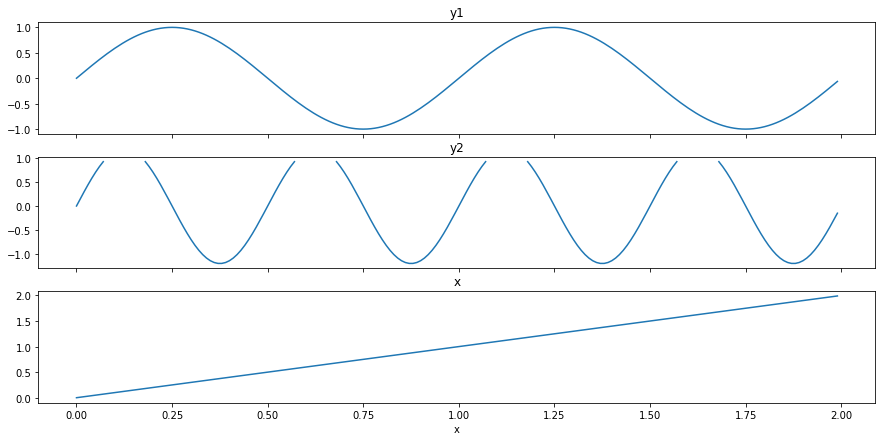

In [28]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)

ax1.plot(x, y1)
ax1.set_title('y1')

ax2.plot(x, y2)
ax2.set_title('y2')

ax3.plot(x, x)
ax3.set_title('x')
ax3.set_xlabel('x')
plt.show()

**두 곡선 사이를 색칠**

Text(0.5, 0, 'x')

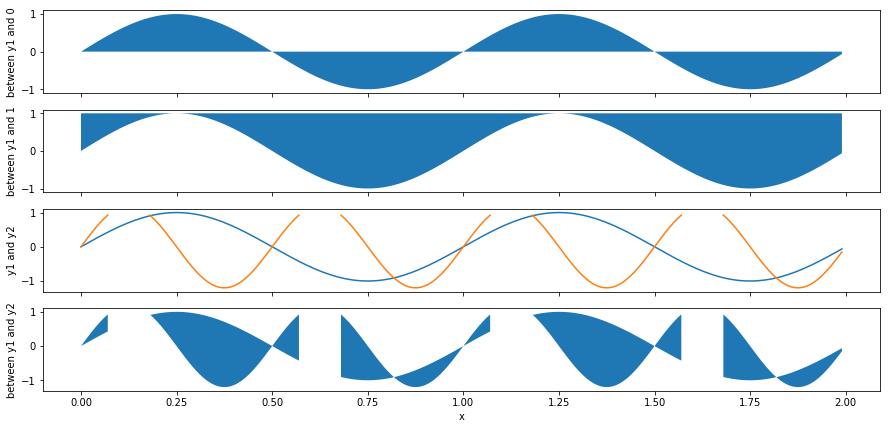

In [51]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, 1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.plot(x, y1)
ax3.plot(x,y2)
ax3.set_ylabel('y1 and y2')


ax4.fill_between(x, y1, y2)
ax4.set_ylabel('between y1 and y2')
ax4.set_xlabel('x')

**where 조건 추가**
- interpolate==True: y곡선의 정의되지 않은 부분을 계산하여 색을 채움

Text(0.5, 1.0, 'Now regions with y2>1 are masked')

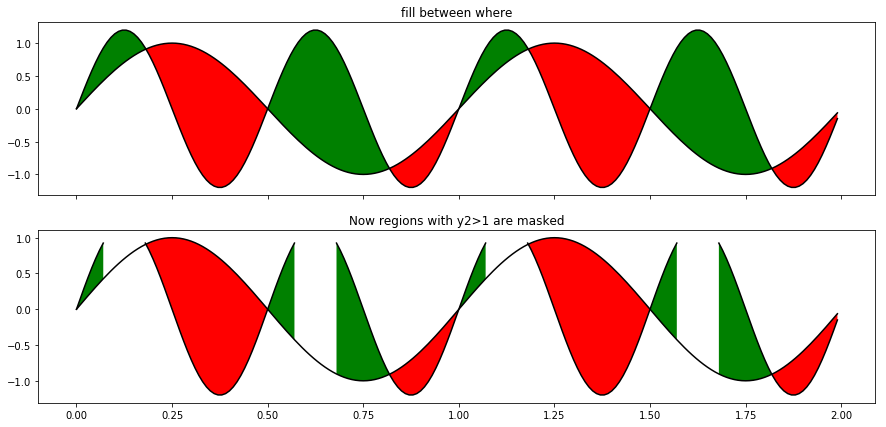

In [53]:
fig, (ax, ax1) = plt.subplots(2, 1, sharex=True)
fig.set_figheight(7)
fig.set_figwidth(15)

ax.plot(x, y1, x, y2, color='black')
ax.fill_between(x, y1, y2, where=y2 >= y1, facecolor='green', interpolate=True) 
ax.fill_between(x, y1, y2, where=y2 <= y1, facecolor='red', interpolate=True)
ax.set_title('fill between where')

# Test support for masked arrays.
y2 = np.ma.masked_greater(y2, 1.0) # 특정 값보다 크면 '--'
ax1.plot(x, y1, x, y2, color='black')
ax1.fill_between(x, y1, y2, where=y2 >= y1,
                 facecolor='green', interpolate=True)
ax1.fill_between(x, y1, y2, where=y2 <= y1,
                 facecolor='red', interpolate=True)
ax1.set_title('Now regions with y2>1 are masked')

**조건 만족하는 모든 구역 색칠**

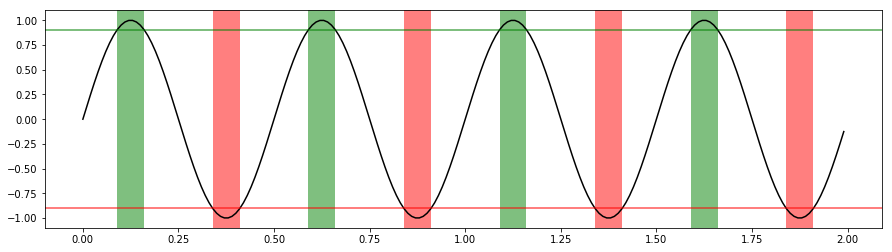

In [23]:
fig, ax = plt.subplots()
y = np.sin(4 * np.pi * x)
ax.plot(x, y, color='black')
fig.set_figheight(4)
fig.set_figwidth(15)

# use data coordinates for the x-axis and the axes coordinates for the y-axis
import matplotlib.transforms as mtransforms
trans = mtransforms.blended_transform_factory(ax.transData, ax.transAxes)
theta = 0.9
ax.axhline(theta, color='green', lw=2, alpha=0.5)
ax.axhline(-theta, color='red', lw=2, alpha=0.5)
ax.fill_between(x, 0, 1, where=y > theta,
                facecolor='green', alpha=0.5, transform=trans)
ax.fill_between(x, 0, 1, where=y < -theta,
                facecolor='red', alpha=0.5, transform=trans)


plt.show()